In [10]:
from ultralytics import YOLO

# Load a model
model = YOLO('best.pt')  # load a custom model
img_path = 'D:\\Jupyter Notebooks\\Freelancing\\Monai Dicom\\12 Carotid\\JPG_images\\6.jpg'
results = model(img_path)  # predict on an image



image 1/1 D:\Jupyter Notebooks\Freelancing\Monai Dicom\12 Carotid\JPG_images\6.jpg: 640x640 1 carotid-artery, 409.6ms
Speed: 4.0ms preprocess, 409.6ms inference, 8.0ms postprocess per image at shape (1, 3, 640, 640)


In [2]:
# Process results list
for result in results:
    boxes = result.boxes  # Boxes object for bbox outputs
    masks = result.masks  # Masks object for segmentation masks outputs
    keypoints = result.keypoints  # Keypoints object for pose outputs
    probs = result.probs  # Class probabilities for classification outputs

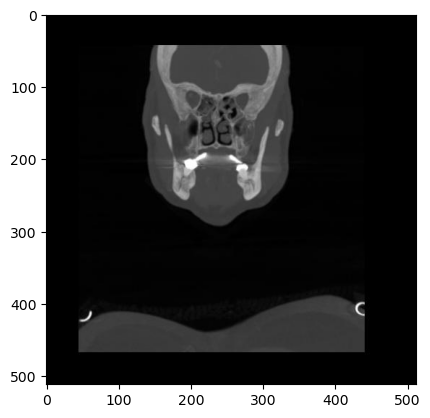

In [3]:
# plot the results over the image
import matplotlib.pyplot as plt
import cv2 

img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)


image 1/1 D:\Jupyter Notebooks\Freelancing\Monai Dicom\12 Carotid\Images to segment\130.jpg: 416x640 1 carotid-artery, 258.0ms
Speed: 2.0ms preprocess, 258.0ms inference, 4.0ms postprocess per image at shape (1, 3, 416, 640)


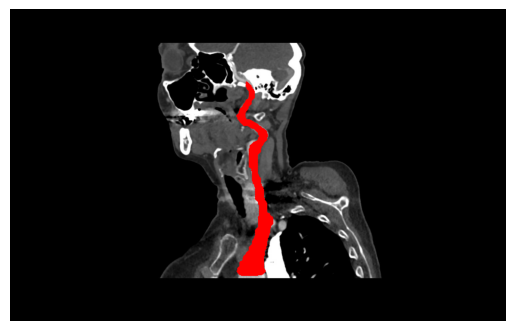

True

In [14]:
import cv2
import matplotlib.pyplot as plt
from ultralytics import YOLO
import numpy as np

# Load a model
model = YOLO('best.pt')  # load a custom model
img_path = 'D:\\Jupyter Notebooks\\Freelancing\\Monai Dicom\\12 Carotid\\Images to segment\\130.jpg'
results = model(img_path)  # predict on an image

# Retrieve the image and the predicted mask
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert from BGR to RGB

for result in results:
    boxes = result.boxes  # Boxes object for bbox outputs
    masks = result.masks  # Masks object for segmentation masks outputs
    keypoints = result.keypoints  # Keypoints object for pose outputs
    probs = result.probs  # Class probabilities for classification outputs

    # Apply each mask to the image
    for mask in masks.data:
        color_mask = np.array([255, 0, 0], dtype=int)  # Red color for the mask
        mask = mask.bool().numpy()  # Convert mask to boolean array
        mask = cv2.resize(mask.astype(np.uint8), (img.shape[1], img.shape[0]), interpolation=cv2.INTER_LINEAR)  # Resize mask to match image dimensions
        img[mask > 0] = color_mask  # Apply red color to the mask

# Display the image with masks
plt.imshow(img)
plt.axis('off')
plt.show()

# Save the image
output_path = 'D:\\Jupyter Notebooks\\Freelancing\\Monai Dicom\\12 Carotid\\Images to segment\\output\\output.jpg'
cv2.imwrite(output_path, cv2.cvtColor(img, cv2.COLOR_RGB2BGR))  # Convert from RGB to BGR and save


In [6]:
import cv2
import os
import numpy as np
import pydicom
from pydicom.dataset import Dataset, FileDataset
from pydicom.uid import generate_uid
from ultralytics import YOLO

# Load a model
model = YOLO('best.pt')  # load a custom model

# Set input and output folders
input_folder = 'D:\\Jupyter Notebooks\\Freelancing\\Monai Dicom\\png'
output_folder = 'D:\\Jupyter Notebooks\\Freelancing\\Monai Dicom\\01 Carotid\\Intances'

# Initialize a list to store the output images
output_images = []
output_size = (640, 640)
# Loop through all image files in the input folder
for filename in os.listdir(input_folder):
    if filename.endswith('.jpg') or filename.endswith('.jpeg') or filename.endswith('.png'):
        # Load the image
        img_path = os.path.join(input_folder, filename)
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert from BGR to RGB

        # Predict with the YOLO model and retrieve the masks
        results = model(img_path)
        try : 
            for result in results:
                masks = result.masks  # Masks object for segmentation masks outputs
            
            # Apply each mask to the image
            for mask in masks.data:
                color_mask = np.array([255, 0, 0], dtype=int)  # Red color for the mask
                mask = mask.bool().numpy()  # Convert mask to boolean array
                mask = cv2.resize(mask.astype(np.uint8), (img.shape[1], img.shape[0]), interpolation=cv2.INTER_LINEAR)  # Resize mask to match image dimensions
                img[mask > 0] = color_mask  # Apply red color to the mask
                   # Resize the image to the common size
                img = cv2.resize(img, output_size, interpolation=cv2.INTER_LINEAR)

            # Add the resulting image to the list of output images
            output_images.append(img)
        except :
            print("Error in image : ", filename)


image 1/1 D:\Jupyter Notebooks\Freelancing\Monai Dicom\png\img_0.png: 640x640 1 carotid-artery, 420.1ms
Speed: 3.0ms preprocess, 420.1ms inference, 8.0ms postprocess per image at shape (1, 3, 640, 640)


In [10]:
mask.dtype

dtype('uint8')

In [8]:
color_mask.shape,img.shape,mask.shape

((3,), (640, 640, 3), (512, 512))

In [4]:
# Create a new DICOM file
output_filename = os.path.join(output_folder, 'output.dcm')
ds = FileDataset(output_filename, {}, file_meta={}, preamble=b"\0" * 128)
output_images = np.array(output_images)
# Set necessary DICOM metadata
ds.Modality = 'CT'
ds.SeriesInstanceUID = generate_uid()
ds.StudyInstanceUID = generate_uid()
ds.FrameOfReferenceUID = generate_uid()
ds.BitsStored = 8
ds.SamplesPerPixel = 1
ds.PhotometricInterpretation = "RGB"  # Use MONOCHROME2 for grayscale images
ds.PixelRepresentation = 0
ds.HighBit = 15
ds.Rows = output_images.shape[1]
ds.Columns = output_images.shape[2]
ds.NumberOfFrames = output_images.shape[0]  # Set the number of frames to the number of slices

# Set pixel data
ds.PixelData = output_images.astype(np.uint8).tobytes()

# Save DICOM file
ds.save_as(output_filename)


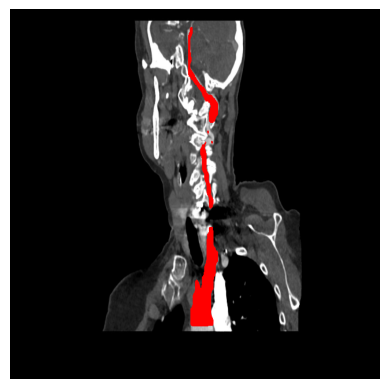

In [26]:
# visualize some of the images from the output_images array
import matplotlib.pyplot as plt
plt.imshow(output_images[7, :, :, :], cmap='gray')
plt.axis('off')
plt.show()


In [5]:
img.shape

(512, 512, 3)